In [85]:
import pandas  as pd
import matplotlib.pyplot as plt

In [25]:
data = pd.read_excel("online_retail_II.xlsx")

In [18]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB
None


In [28]:
print(data.isna().sum(), data.shape[0])

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64 525461


In [30]:
data_dup = data.drop_duplicates()
print(data_dup.shape[0])

518596


In [36]:
data_Inv = data_dup[data_dup["Invoice"].apply(lambda x: not str(x).startswith("C"))]
print(data_Inv.shape[0])

508414


In [44]:
print(data_Inv["Quantity"].describe())
print(data_Inv["Price"].describe())

count    508414.000000
mean         11.066713
std         105.046657
min       -9600.000000
25%           1.000000
50%           3.000000
75%          12.000000
max       19152.000000
Name: Quantity, dtype: float64
count    508414.000000
mean          3.974406
std         128.544348
min      -53594.360000
25%           1.250000
50%           2.100000
75%           4.210000
max       25111.090000
Name: Price, dtype: float64


In [45]:
# Finding  Quantity column IQR
Q1_quantity = data_Inv["Quantity"].quantile(0.25)
Q3_quantity = data_Inv["Quantity"].quantile(0.75)

In [46]:
# Finding Price column IQR
Q1_price = data_Inv["Price"].quantile(0.25)
Q3_price = data_Inv["Price"].quantile(0.75)

In [55]:
# Removing outliers from Price and Outliers columns
data_outlier = data_Inv[(data_Inv["Quantity"]>=Q1_quantity) & (data_Inv["Quantity"]<= Q3_quantity)]
data_outlier = data_outlier[(data_outlier["Price"]>=Q1_price) & (data_outlier["Price"]<= Q3_price)]

print(data_outlier["Quantity"].describe())
print(data_outlier["Price"].describe())

count    257482.000000
mean          4.713778
std           3.920205
min           1.000000
25%           1.000000
50%           3.000000
75%           6.000000
max          12.000000
Name: Quantity, dtype: float64
count    257482.000000
mean          2.299194
std           0.879784
min           1.250000
25%           1.650000
50%           2.100000
75%           2.950000
max           4.210000
Name: Price, dtype: float64


In [56]:
print(data_outlier.isna().sum(), data_outlier.shape[0])

Invoice            0
StockCode          0
Description        0
Quantity           0
InvoiceDate        0
Price              0
Customer ID    54947
Country            0
dtype: int64 257482


In [57]:
data_customer = data_outlier[~data_outlier["Customer ID"].isna()]
print(data_customer.isna().sum())

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


In [78]:
# Number of Unique Product
print(data_customer["StockCode"].nunique())


2268


In [62]:
# Total Number of transactions
print(data_customer["Invoice"].count())

202535


In [77]:
# Number of unique customers
print(data_customer["Customer ID"].nunique())

4000


In [65]:
# Top Countries Customer belong to
print(data_customer["Country"].value_counts().head())

Country
United Kingdom    187083
Germany             3578
EIRE                3488
France              2452
Netherlands          671
Name: count, dtype: int64


In [68]:
# Top 10 selling products by quantity
print(data_customer.groupby("StockCode")["Quantity"].sum().sort_values(ascending=False).head(10))

StockCode
85123A    13847
21232      8253
85099B     8113
20725      7741
84836      5877
22382      5628
22383      5609
22469      5376
20972      5170
20727      5167
Name: Quantity, dtype: int64


In [69]:
# Top 10  revenue-generating products
print(data_customer.groupby("StockCode")["Price"].sum().sort_values(ascending=False).head(10))

StockCode
85123A    6672.17
22114     3036.05
22470     2792.85
20914     2736.80
82494L    2668.80
21733     2571.95
22189     2476.80
85099B    2292.00
84029E    2286.48
84997B    2190.00
Name: Price, dtype: float64


In [74]:
# Products have negative or zero unit prices: None
print(data_customer[data_customer["Price"]<=0])

Empty DataFrame
Columns: [Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, Country]
Index: []


In [82]:
# Top 5 Customers that bought the most products
data_customer = data_customer.copy()
data_customer["Customer ID"] = data_customer["Customer ID"].astype(int)
print(data_customer.groupby("Customer ID")["Quantity"].sum().sort_values(ascending=False).head(5))

Customer ID
14911    20482
17850     9878
14156     8738
13089     6063
17841     5520
Name: Quantity, dtype: int64


In [84]:
# Distribution of purchases per customer, and loyal customers
print(data_customer.groupby("Customer ID")["Invoice"].nunique().sort_values(ascending=False).head())

Customer ID
14911    171
17850    155
12748    105
15311    105
14606     95
Name: Invoice, dtype: int64


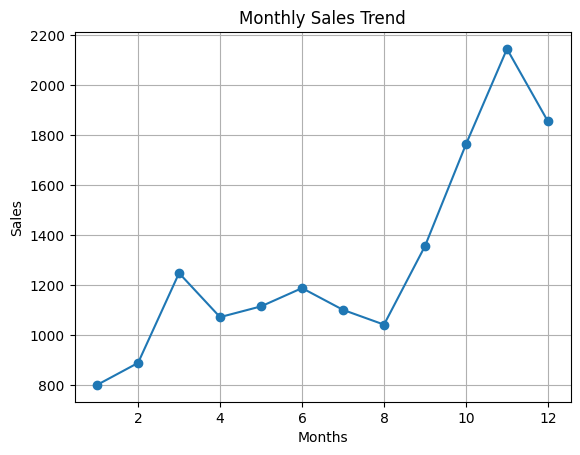

In [118]:
# Monthly sales trend
# print(data_customer.groupby(data_customer["InvoiceDate"].dt.month)["Invoice"].nunique())
monthly_sales_trend = data_customer.groupby(data_customer["InvoiceDate"].dt.month)["Invoice"].nunique()
monthly_sales_trend.plot(marker="o")
plt.xlabel("Months")
plt.ylabel("Sales")
plt.title("Monthly Sales Trend")
plt.grid(True)
plt.show()

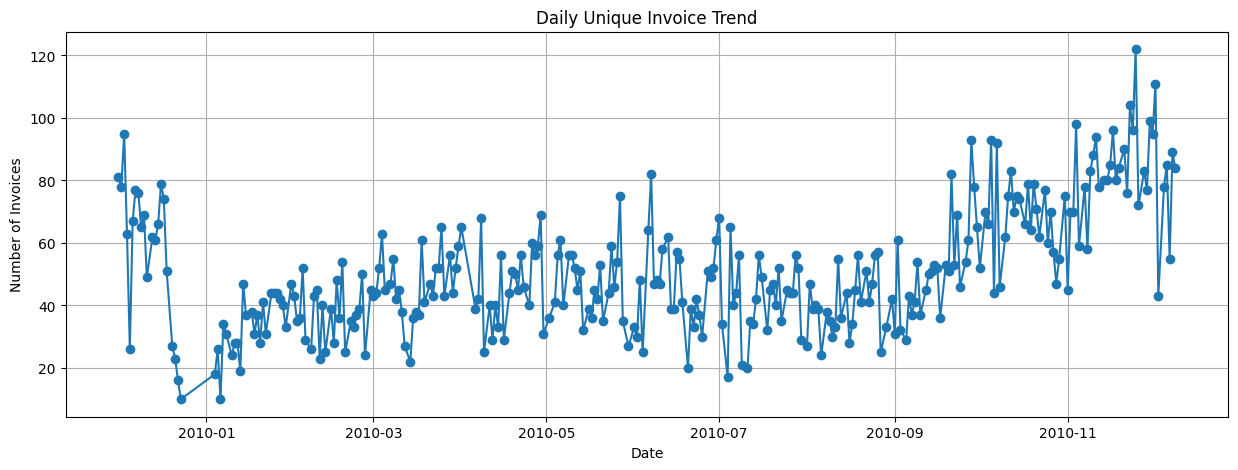

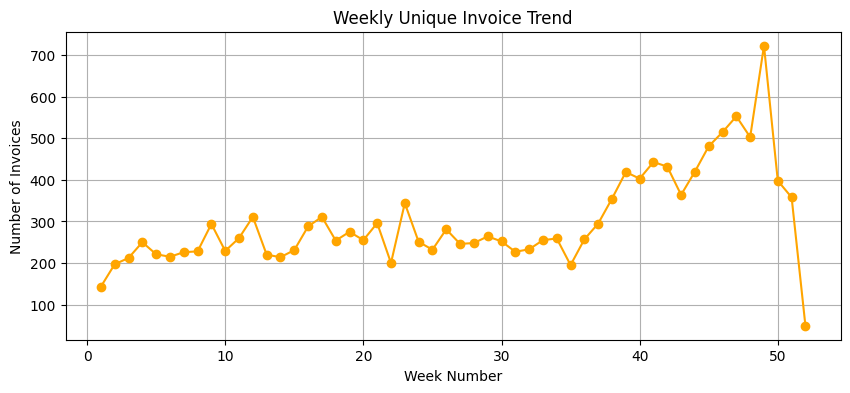

In [123]:
daily_sales_trend = data_customer.groupby(data_customer["InvoiceDate"].dt.date)["Invoice"].nunique()
weekly_sales_trend = data_customer.groupby(data_customer["InvoiceDate"].dt.isocalendar().week)["Invoice"].nunique()
# print(daily_sales_trend)

plt.figure(figsize=(15, 5))
daily_sales_trend.plot(kind="line", marker="o")
plt.title("Daily Unique Invoice Trend")
plt.xlabel("Date")
plt.ylabel("Number of Invoices")
plt.grid(True)
plt.show()

# Plotting Weekly Sales Trend
plt.figure(figsize=(10, 4))
weekly_sales_trend.plot(kind="line", color='orange', marker='o')
plt.title("Weekly Unique Invoice Trend")
plt.xlabel("Week Number")
plt.ylabel("Number of Invoices")
plt.grid(True)
plt.show()


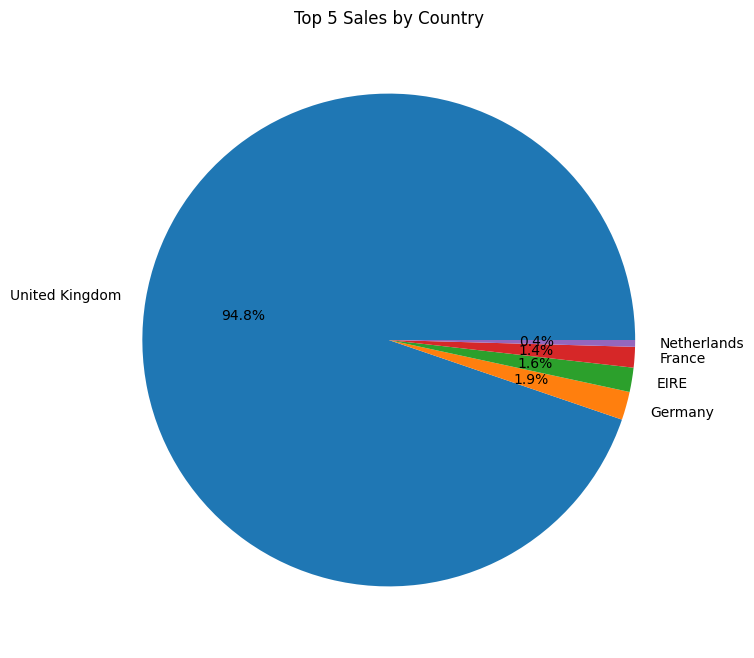

In [156]:
sales_pr_country = data_customer.groupby("Country")["Invoice"].nunique().sort_values(ascending=False).head(5)
# print(sales_pr_country)
plt.figure(figsize=(20,8))
sales_pr_country.plot(kind="pie",autopct='%1.1f%%')
plt.title("Top 5 Sales by Country")
plt.ylabel("")
plt.show()

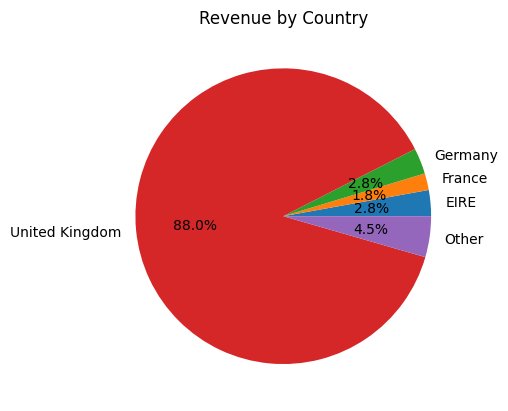

In [181]:
data_customer["Revenue"] = data_customer["Price"] * data_customer["Quantity"]
revenue_pr_country = data_customer.groupby("Country")["Revenue"].sum()
revenue_percent = (revenue_pr_country / revenue_pr_country.sum())*100

main_countries = revenue_percent[revenue_percent>=1]
main_countries["Other"] = revenue_percent[revenue_percent<1].sum()

main_countries.plot(kind="pie",autopct="%1.1f%%")
plt.ylabel("")
plt.title("Revenue by Country")
plt.show()

In [198]:
#  RFM (Recency, Frequency, Monetary) Segmentation of Customers

recency_customer = data_customer.groupby("Customer ID")["InvoiceDate"].max()
frequency_customer_purchases = data_customer.groupby("Customer ID")["Invoice"].sum()
expenditure_pr_customer = data_customer.groupby("Customer ID")["Revenue"].sum()

print(f"\tRecent Customers\n\n{recency_customer}\n")
print(f"\tFrequency of Customers\n\n{frequency_customer_purchases}\n")
print(f"\tRevenue By Customers\n\n{expenditure_pr_customer}\n")


	Recent Customers

Customer ID
12346   2010-03-02 13:08:00
12347   2010-12-07 14:57:00
12348   2010-09-27 14:59:00
12349   2010-10-28 08:23:00
12351   2010-11-29 15:23:00
                ...        
18283   2010-11-22 15:30:00
18284   2010-10-04 11:33:00
18285   2010-02-17 10:24:00
18286   2010-08-20 11:57:00
18287   2010-11-22 11:51:00
Name: InvoiceDate, Length: 4000, dtype: datetime64[ns]

	Frequency of Customers

Customer ID
12346      499763
12347    22418550
12348     2096560
12349    22256892
12351     5896132
           ...   
18283    79808641
18284     6301368
18285     1494447
18286    17479945
18287    23121579
Name: Invoice, Length: 4000, dtype: object

	Revenue By Customers

Customer ID
12346      3.25
12347    730.20
12348     69.60
12349    750.56
12351    185.28
          ...  
18283    381.59
18284    188.10
18285     33.60
18286    569.70
18287    814.92
Name: Revenue, Length: 4000, dtype: float64



In [203]:
data_customer.to_csv("online_retail_II_cleaned.csv",index=False)
# print(data_customer)